<img src="https://www.wellcomeconnectingscience.org/wp-content/themes/new_wellcome_connecting_science/dist/assets/svg/logo.svg" alt="WCS Logo" width="150" style="float: left;">
<img src="https://github.com/EveliaCoss/Tutorial_ISCB_LATAM_scATACseq/blob/main/Logo_JAGUAR.png?raw=true" alt="WCS Logo" width="150" style="float: right;">





# Analyzing PBMCs Single Cell ATAC- Seq (scATAC-Seq) and Multiome data: Theory and practice

## About the course 📌

This course is part of the Workshop [Single Cell Genomic Approaches to Study the Immune System - Latin America & the Caribbean](https://coursesandconferences.wellcomeconnectingscience.org/event/single-cell-genomic-approaches-to-study-the-immune-system-latin-america-the-caribbean-20241109/) (9-11 Novembrer 2024), Universidad CES, Medellín, Colombia.

- **Date:** 11 November 2024
- **Course duration**: 5 hours

**Speakers:**

- <font color='orange'>Diego Ramirez</font> - Bachelor in Genomic Sciences, Escuela Nacional de Estudios Superiores Unidad Juriquilla UNAM (ENES Juriquilla), Mexico.
- <font color='orange'>Evelia Lorena Coss-Navarrete</font> - PostDoc, International Laboratory for Human Genome Research (LIIGH)-UNAM, Mexico. Contact: [Web page](https://eveliacoss.github.io/)




# 4️⃣ Practical 16: Motif analysis

## Settings 💻 <a name="setup"></a>

In [23]:
start_time <- Sys.time()
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)
shell_call("rm add_cranapt_jammy.sh")

cranPkgs <- c("BiocManager", "Seurat", "cowplot", "SingleCellExperiment", "scDblFinder", "Rtsne", "hdf5r", "clustree",
              "tidyverse", "Signac", "SeuratObject", "hdf5r", "reticulate", "patchwork", "ggplot2", "future")
biocPkgs <- c("celldex", "SingleR", "SeuratDisk", "clusterProfile", "preprocessCore", "EnsDb.Hsapiens.v86", "EnsDb.Hsapiens.v75",
              "biovizBase", "LoomExperiment", "SingleCellExperiment", "JASPAR2020", "TFBSTools", "glmGamPoi", "clusterProfiler", "org.Hs.eg.db"
              , "BSgenome.Hsapiens.UCSC.hg38","BSgenome.Hsapiens.UCSC.hg19", "ggseqlogo", "motifmatchr")

# Install packages from CRAN
install.packages(cranPkgs, ask=FALSE, update=TRUE, quietly=TRUE)

# Install packages from Bioconductor
if (!requireNamespace("BiocManager", quietly = TRUE)) {
    install.packages("BiocManager")
}
BiocManager::install(biocPkgs)

# Install SeuratData and sceasy from GitHub
if (!requireNamespace("devtools", quietly = TRUE)) {
    install.packages("devtools")
}

devtools::install_github('satijalab/seurat-data')
devtools::install_github("cellgeni/sceasy")
devtools::install_github("thomasp85/patchwork")

# Verify and install SeuratData from Bioconductor if necessary
if (!requireNamespace("SeuratData", quietly = TRUE)) {
    BiocManager::install("SeuratData")
}

#Install presto
if (!requireNamespace("remotes", quietly = TRUE))
  install.packages('remotes')
remotes::install_github('immunogenomics/presto')

loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

pkgs = c("Rtsne", "Seurat", "SingleCellExperiment", "scDblFinder", "tidyverse", "future",
         "cowplot", "preprocessCore", "SingleR", "clusterProfile", "celldex", "SeuratDisk", "pheatmap", "patchwork", "ggplot2",
         "hdf5r", "clustree", "tidyverse", "Signac", "SeuratObject", "hdf5r", "reticulate", "EnsDb.Hsapiens.v86", "EnsDb.Hsapiens.v75",
         "biovizBase", "LoomExperiment", "SingleCellExperiment", "glmGamPoi", "clusterProfiler", "org.Hs.eg.db",
         "BSgenome.Hsapiens.UCSC.hg38", "BSgenome.Hsapiens.UCSC.hg19", "presto", "ggseqlogo", "motifmatchr", "patchwork",
         "JASPAR2020", "TFBSTools")
# Load the packages
loadPackages(pkgs)

loaded_packages <- sessionInfo()$otherPkgs
names(loaded_packages)

cat("Versión de R:", R.version$version.string, "\n")
cat("Numero de cores:", availableCores(), "\n")
packageVersion("Signac")
plan("multicore", workers = 2)
plan()
options(future.globals.maxSize = 10 * 1024^3)

51 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
ca-certificates is already the newest version (20240203~22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW+Lhx0jFW9Ca3g1taLfbSDyS3X1mOGWcisbQvBqkIuoDQTeS
V4Z04wrwTZ1HtweKG/s5fmPtZNGWVI5YNRLIwdmbGzFTMPu2XTAOd+xSK2H+46Kh
Sh4kFeP6pBh5No4ET1MzIuDAHwl0J+mbWKPH4tIosYkcVmv

Tracing function "install.packages" in package "utils"

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'celldex' 'SingleR' 'preprocessCore'
  'EnsDb.Hsapiens.v86' 'EnsDb.Hsapiens.v75' 'biovizBase' 'LoomExperiment'
  'SingleCellExperiment' 'JASPAR2020' 'TFBSTools' 'glmGamPoi' 'clusterProfiler'
  'org.Hs.eg.db' 'BSgenome.Hsapiens.UCSC.hg38' 'BSgenome.Hsapiens.UCSC.hg19'
  'ggseqlogo' 'motifmatchr'"
Installing package(s) 'SeuratDisk', 'clusterProfile'

Warning message:
"packages 'SeuratDisk', 'clusterProfile' are not available for Bioconductor version '3.19'

Versions of these packages for your version of R might be available elsewhere,
see the ideas

[1] "TFBSTools"                   "JASPAR2020"                 
 [3] "motifmatchr"                 "ggseqlogo"                  
 [5] "presto"                      "data.table"                 
 [7] "Rcpp"                        "BSgenome.Hsapiens.UCSC.hg19"
 [9] "BSgenome.Hsapiens.UCSC.hg38" "BSgenome"                   
[11] "rtracklayer"                 "Biostrings"                 
[13] "XVector"                     "org.Hs.eg.db"               
[15] "clusterProfiler"             "glmGamPoi"                  
[17] "LoomExperiment"              "BiocIO"                     
[19] "rhdf5"                       "biovizBase"                 
[21] "EnsDb.Hsapiens.v75"          "EnsDb.Hsapiens.v86"         
[23] "ensembldb"                   "AnnotationFilter"           
[25] "GenomicFeatures"             "AnnotationDbi"              
[27] "reticulate"                  "Signac"                     
[29] "clustree"                    "ggraph"                     
[31] "hdf5r"                       "patchwork"                  
[33] "pheatmap"                    "celldex"                    
[35] "SingleR"                     "preprocessCore"             
[37] "cowplot"                     "future"                     
[39] "lubridate"                   "forcats"                    
[41] "stringr"                     "dplyr"                      
[43] "purrr"                       "readr"                      
[45] "tidyr"                       "tibble"                     
[47] "ggplot2"                     "tidyverse"                  
[49] "scDblFinder"                 "SingleCellExperiment"       
[51] "SummarizedExperiment"        "Biobase"                    
[53] "GenomicRanges"               "GenomeInfoDb"               
[55] "IRanges"                     "S4Vectors"                  
[57] "BiocGenerics"                "MatrixGenerics"             
[59] "matrixStats"                 "Seurat"                     
[61] "SeuratObject"                "sp"                         
[63] "Rtsne"

Versión de R: R version 4.4.1 (2024-06-14) 
Numero de cores: 2 


[1] '1.14.0'

multicore:
- args: function (..., workers = 2, envir = parent.frame())
- tweaked: TRUE
- call: plan("multicore", workers = 2)

## Load the dataset

For this tutorial, We will load the final processed pbmc dataset from Practice 14.


### Step 1 - Load data

Download the file previously generated in the previous practice (Practical 14). If you did not download it ("pbmc_complete.RData") then download it by clicking [here](https://drive.google.com/file/d/1PJQkBOqngOozISRIE9hjAEtkaVPeaHve/view?usp=sharing) and upload the file to google colab.

In [24]:
set.seed(1234)

In [25]:
load("pbmc_final.RData")

In [26]:
# add annotation
Idents(pbmc) <- pbmc$predicted.id

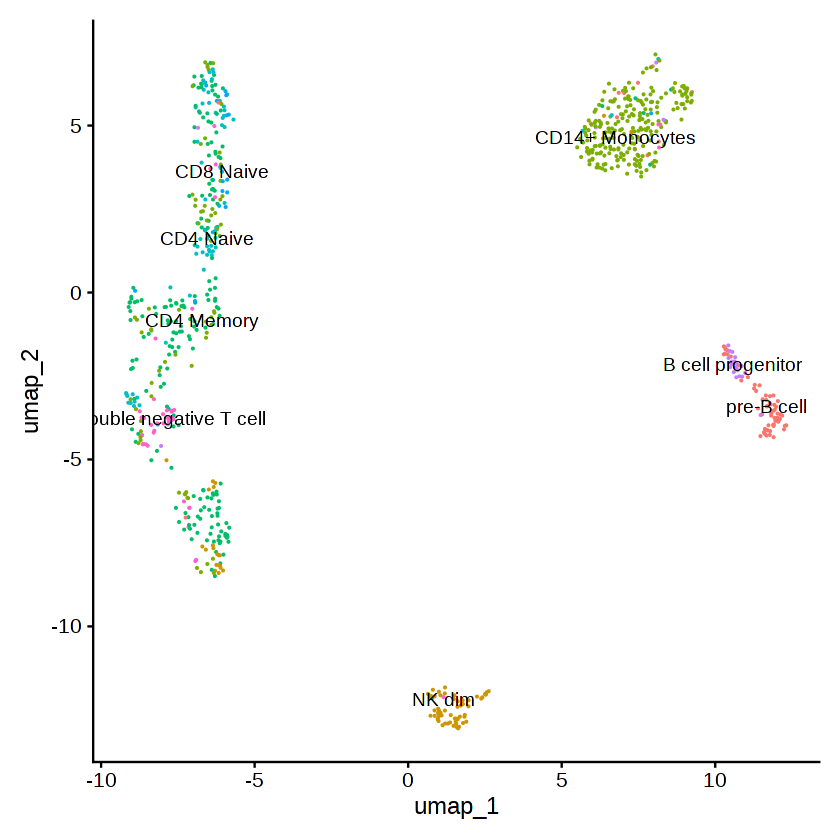

In [27]:
DimPlot(pbmc, label = TRUE, pt.size = 0.1) + NoLegend()

### Step 2: Adding motif information to the Seurat object
To add the DNA sequence motif information required for motif analyses, we can run the AddMotifs() function:

In [28]:
# Get a list of motif position frequency matrices from the JASPAR database
pfm <- getMatrixSet(
    x = JASPAR2020,
    opts = list(species = "Homo sapiens", all_versions = FALSE)
)

In [29]:
# add motif information (~2 min)
pbmc <- AddMotifs(
  object = pbmc,
  genome = BSgenome.Hsapiens.UCSC.hg19,
  pfm = pfm
)

Building motif matrix

Finding motif positions

Creating Motif object



### Finding overrepresented motifs
To identify potentially important cell-type-specific regulatory sequences, we can search for DNA motifs that are overrepresented in a set of peaks that are differentially accessible between cell types.

Here, we find differentially accessible peaks between Pvalb and Sst inhibitory interneurons. For sparse data (such as scATAC-seq), we find it is often necessary to lower the min.pct threshold in FindMarkers() from the default (0.1, which was designed for scRNA-seq data).

We then perform a hypergeometric test to test the probability of observing the motif at the given frequency by chance, comparing with a background set of peaks matched for GC content.

In [30]:
# (~ 3 min)
DefaultAssay(pbmc) <- "ATAC"
da_peaks <- FindMarkers(
  object = pbmc,
  ident.1 = 'CD14+ Monocytes',
  ident.2 = 'pre-B cell',
  only.pos = TRUE,
  test.use = 'LR',
  min.pct = 0.05,
  latent.vars = 'nCount_ATAC'
)
head(da_peaks)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr2-28612892-28619937,3.886397e-20,1.9234271,0.738,0.303,1.874798e-15
chr2-8821021-8823886,4.243807e-14,2.0273021,0.602,0.211,2.047212e-09
chr19-44172135-44174733,6.649406e-14,1.6719788,0.772,0.355,3.207674e-09
chr19-13941093-13954578,5.124264e-13,0.9656674,0.929,0.829,2.471945e-08
chr15-92395831-92398305,2.046664e-11,2.1326685,0.500,0.105,9.873108e-07
chr16-50729491-50731093,3.911842e-11,4.6147659,0.340,0.013,1.887073e-06


In [31]:
# get top differentially accessible peaks
top.da.peak <- rownames(da_peaks[da_peaks$p_val < 0.005 & da_peaks$pct.1 > 0.2, ])

In [32]:
# test enrichment
enriched.motifs <- FindMotifs(
  object = pbmc,
  features = top.da.peak
)

Selecting background regions to match input sequence characteristics

Matching GC.percent distribution

Testing motif enrichment in 844 regions



In [33]:
head(enriched.motifs)

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
MA0476.1,MA0476.1,350,5116,41.46919,12.7900,3.242314,2.246371e-98,FOS,1.421953e-95
MA0489.1,MA0489.1,341,5133,40.40284,12.8325,3.148478,1.113477e-91,JUN(var.2),2.593082e-89
MA1141.1,MA1141.1,324,4648,38.38863,11.6200,3.303668,1.228949e-91,FOS::JUND,2.593082e-89
MA0477.2,MA0477.2,334,4941,39.57346,12.3525,3.203680,2.010344e-91,FOSL1,3.181370e-89
MA0462.2,MA0462.2,361,5797,42.77251,14.4925,2.951355,3.451842e-90,BATF::JUN,4.370032e-88
MA1634.1,MA1634.1,361,5806,42.77251,14.5150,2.946780,5.417187e-90,BATF,5.715133e-88


We can also plot the position weight matrices for the motifs, so we can visualize the different motif sequences.

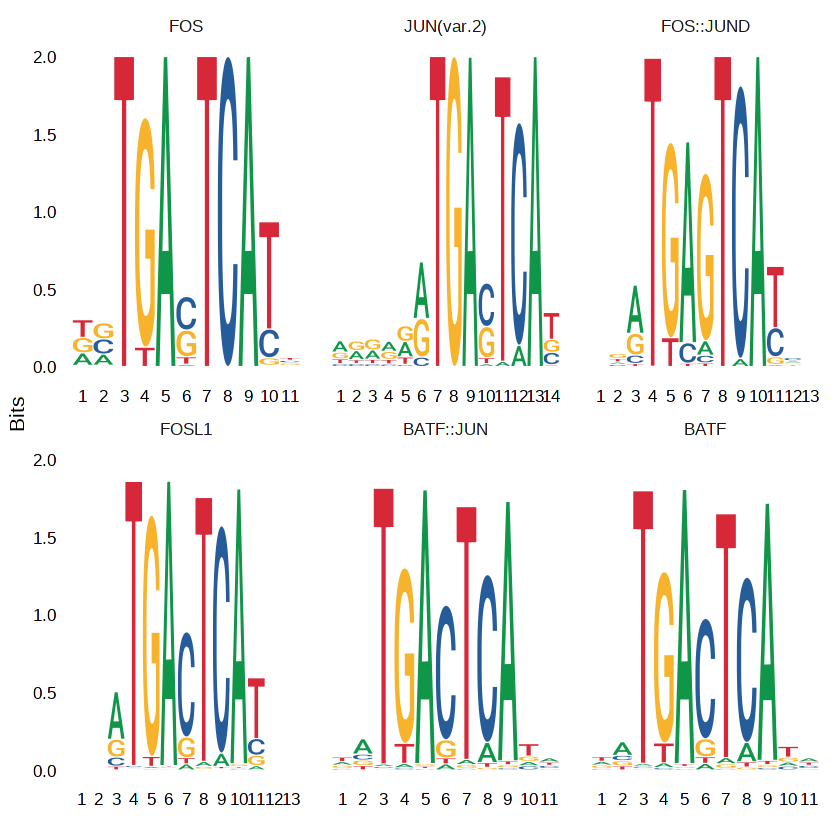

In [34]:
MotifPlot(
  object = pbmc,
  motifs = head(rownames(enriched.motifs))
)

## Transcription factor footprinting

In [35]:
# extract position frequency matrices for the motifs (~3min)
pwm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(species = 9606, all_versions = FALSE)
)

# add motif information
pbmc <- AddMotifs(pbmc, genome = BSgenome.Hsapiens.UCSC.hg19, pfm = pwm)

Building motif matrix

Finding motif positions

Creating Motif object



### Motif footprinting
Now we can footprint any motif that we have positional information for. By default, this includes every instance of the motif in the genome. We can instead use the in.peaks = TRUE parameter to include only those motifs that fall inside a peak in the assay. The Footprint() function gathers all the required data and stores it in the assay. We can then plot the footprinted motifs using the PlotFootprint() function.

Download fragment files and fragment file index from  [human peripheral blood mononuclear cells (PBMCs)](https://www.10xgenomics.com/datasets/1-k-peripheral-blood-mononuclear-cells-pbm-cs-from-a-healthy-donor-next-gem-v-1-1-1-1-standard-1-1-0).

In [36]:
# Download
# Fragment file
system("wget https://cf.10xgenomics.com/samples/cell-atac/1.1.0/atac_pbmc_1k_nextgem/atac_pbmc_1k_nextgem_fragments.tsv.gz")
# Fragment file index
system("wget https://cf.10xgenomics.com/samples/cell-atac/1.1.0/atac_pbmc_1k_nextgem/atac_pbmc_1k_nextgem_fragments.tsv.gz.tbi")

In [37]:
# gather the footprinting information for sets of motifs (1 min)
pbmc <- Footprint(
  object = pbmc,
  motif.name = c("GATA2", "CEBPA", "EBF1"),
  genome = BSgenome.Hsapiens.UCSC.hg19
)

# plot the footprint data for each group of cells
p2 <- PlotFootprint(pbmc, features = c("GATA2", "CEBPA", "EBF1"))

Computing Tn5 insertion bias

Extracting reads in requested region

Warning message in size + sum(size_args, na.rm = FALSE):
"NAs produced by integer overflow"
Computing observed Tn5 insertions per base

Computing base composition at motif sites

Computing expected Tn5 insertions per base

Finding + strand cut sites

Finding - strand cut sites

Computing observed Tn5 insertions per base

Computing base composition at motif sites

Computing expected Tn5 insertions per base

Finding + strand cut sites

Finding - strand cut sites

Computing observed Tn5 insertions per base

Computing base composition at motif sites

Computing expected Tn5 insertions per base

Finding + strand cut sites

Finding - strand cut sites



Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 4088 rows containing missing values or values outside the scale range
(`geom_label_repel()`)."
Warning message:
"Removed 4112 rows containing missing values or values outside the scale range
(`geom_label_repel()`)."
Warning message:
"Removed 4120 rows containing missing values or values outside the scale range
(`geom_label_repel()`)."


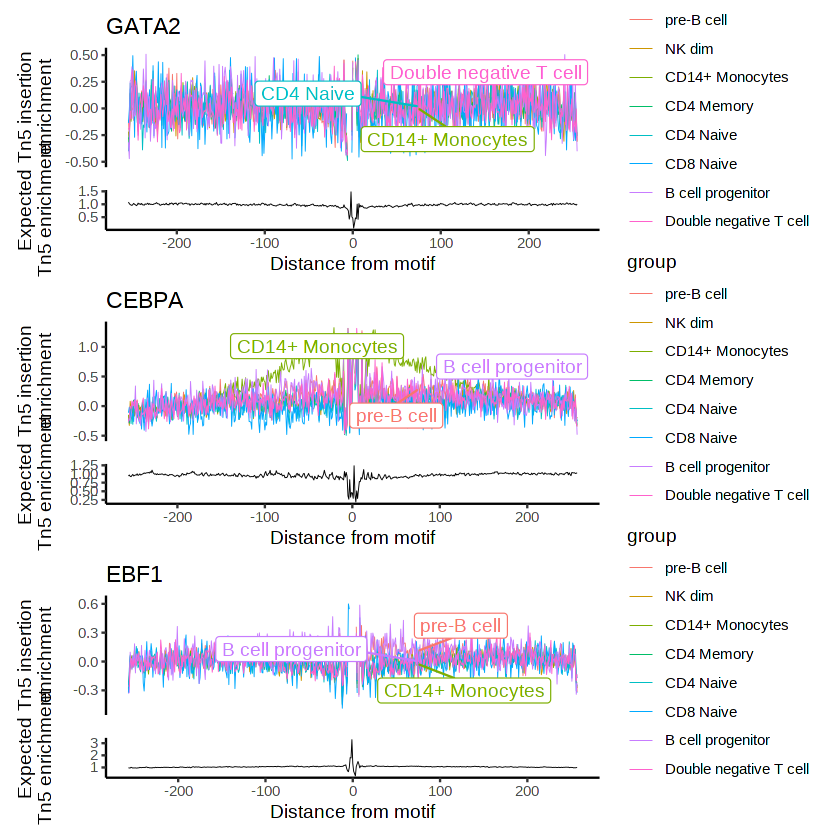

In [38]:
p2 + patchwork::plot_layout(ncol = 1)